In [225]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [226]:
plt.rcParams['figure.figsize'] = [12,5]

# Image 1

## Confocal Images


In [227]:
#tuple import
t_img_RPF = cv.imreadmulti('Data/1/confocal/1RFP.TIF', flags=2)
t_img_CY5 = cv.imreadmulti('Data/1/confocal/1CY5.TIF', flags=2)

#numpy array convert
img_1_con_RPF = np.array(t_img_RPF[1])
img_1_con_CY5 = np.array(t_img_CY5[1])

print("Multilayer TIFF shapes:")
print(img_1_con_RPF.shape)
print(img_1_con_CY5.shape)

#number of layers/z-stack
N_layers = img_1_con_RPF.shape[0]

Multilayer TIFF shapes:
(24, 1400, 1400)
(24, 1400, 1400)


## Structured Illumination Images

In [228]:
#TODO: check if correct import!

#tuple import
t_img_RPF = cv.imreadmulti('Data/1/super_resolution/1RFP.TIF', flags=2)
t_img_CY5 = cv.imreadmulti('Data/1/super_resolution/1CY5.TIF', flags=2)

#numpy array convert
img_1_str_RPF = np.array(t_img_RPF[1])
img_1_str_CY5 = np.array(t_img_CY5[1])

print("Multilayer TIFF shapes:")
print(img_1_str_RPF.shape)
print(img_1_str_CY5.shape)

#number of layers/z-stack
N_layers = img_1_str_RPF.shape[0]

Multilayer TIFF shapes:
(19, 1400, 1400)
(19, 1400, 1400)


# Image 2

## Confocal

In [229]:
#tuple import
t_img_RPF = cv.imreadmulti('Data/2/confocal/3_w1RFP_conf40.TIF', flags=2)
t_img_CY5 = cv.imreadmulti('Data/2/confocal/3_w2CY5_conf40.TIF', flags=2)
#numpy array convert
img_2_con_RPF = np.array(t_img_RPF[1])
img_2_con_CY5 = np.array(t_img_CY5[1])

print("Multilayer TIFF shapes:")
print(img_2_con_RPF.shape)
print(img_2_con_CY5.shape)

#number of layers/z-stack
N_layers = img_2_con_RPF.shape[0]

Multilayer TIFF shapes:
(9, 1400, 1400)
(9, 1400, 1400)


## Structured Illumination

In [230]:
#TODO: check if correct import!

#tuple import
t_img_RPF = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_RFP.TIF', flags=2)
t_img_CY5 = cv.imreadmulti('Data/2/super_resolution/3_VCS_w2VCS_100X_CY5.TIF', flags=2)

#numpy array convert
img_2_str_RPF = np.array(t_img_RPF[1])
img_2_str_CY5 = np.array(t_img_CY5[1])

print("Multilayer TIFF shapes:")
print(img_2_str_RPF.shape)
print(img_2_str_CY5.shape)

#number of layers/z-stack
N_layers = img_2_str_RPF.shape[0]

Multilayer TIFF shapes:
(16, 1400, 1400)
(16, 1400, 1400)


# Analysis

## Image 1, structured illumination, slice 16 (index = 15)

RFP max camera value, layer  15 : 3431
CY5 max camera value, layer  15 : 23


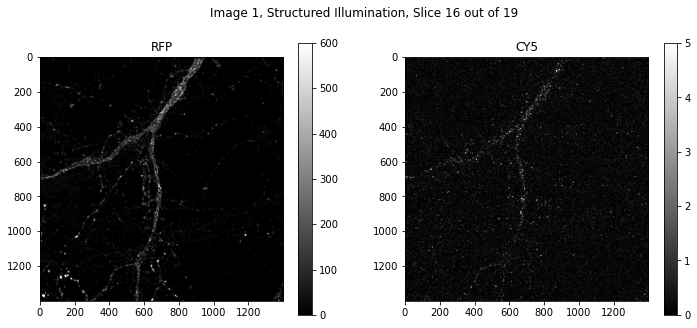

In [231]:
N_layers = img_1_str_RPF.shape[0]
ii = 15

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(img_1_str_RPF[ii,:,:], cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("RFP")

pos2 = ax2.imshow(img_1_str_CY5[ii,:,:], cmap="gray")
pos2.set_clim(0,5)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("CY5")

print("RFP max camera value, layer ", ii, ":", np.amax(img_1_str_RPF[ii,:,:]))
print("CY5 max camera value, layer ", ii, ":", np.amax(img_1_str_CY5[ii,:,:]))

In [232]:
img_RFP = img_1_str_RPF[15,:,:]
img_CY5 = img_1_str_CY5[15,:,:]

In [233]:
#get background
background_RFP = img_RFP[1000, 1000]
print(background_RFP)

background_CY5 = img_CY5[1000, 1000]
print(background_CY5)

19
3


In [234]:
mask_RFP = img_RFP > 135 #returns boolean matrix
bin_RFP = mask_RFP.astype(np.uint8) #converts in matrix of integers either 0 or 1

mask_CY5 = img_CY5 > 1
bin_CY5 = mask_CY5.astype(np.uint8)

Text(0.5, 1.0, 'Binary map image, pixel only above >135')

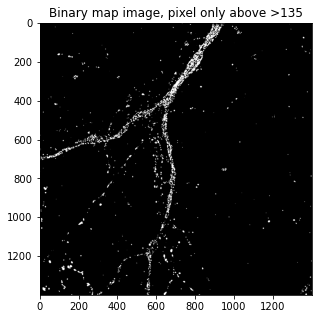

In [235]:
plt.imshow(bin_RFP, cmap='gray')
plt.title("Binary map image, pixel only above >135")

In [236]:
#Erosion on image RFP

kernel_op = np.ones((14,14),np.uint8)
kernel_cl = np.ones((16,16),np.uint8)



closing = cv.morphologyEx(bin_RFP, cv.MORPH_CLOSE, kernel_cl)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel_op)


Text(0.5, 1.0, 'Processed image, 2 cycles of Opening and Closing')

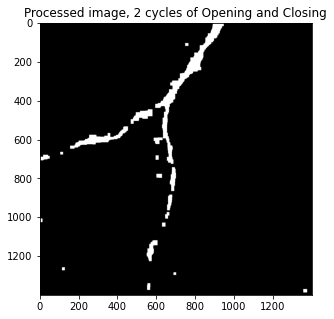

In [237]:
plt.imshow(opening, cmap='gray')
plt.title("Processed image, 2 cycles of Opening and Closing")

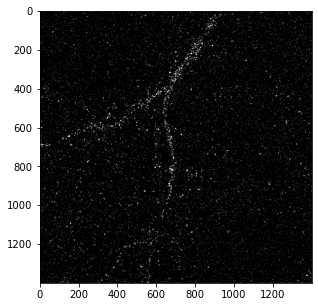

In [238]:
plt.imshow(bin_CY5, cmap="gray")